In [1]:
x = var('x')
eta = var('eta')

In [2]:
# shift map
def f(x, eta) :
  if ( x < 0 ) :  
    return -1 + eta * (x+1)
  else :
    return  1 + eta * (x-1)

In [3]:
def cobweb(eta, xvals) :
  plt  = plot( x, x, -1, 1 , color="black", aspect_ratio='1')
  plt += line(((-1,1),(1,1),(1,-1),(-1,-1),(-1,1)), color="lightgray")
  plt += plot( lambda x:f(x, eta), x, -1, 1, color="green", thickness=3 )

  color   = 0
  Ncolors = len(xvals)
  for x0 in xvals :
    x1 = f(x0, eta)    
    cob_line = [(x0,0), (x0,x1)]
    for i in range(10) :
       x2 = f(x1, eta)
       cob_line += [(x0,x1), (x1,x1), (x1,x2)]
       x0 = x1
       x1 = x2        

    plt += line(cob_line, color=hue(.8-float(color)/(1.8*Ncolors)))
    color += 1

  xi = (pi/10).n()
  for dummy in range(1000) :
    xi = f(xi, eta)
    
  attractor = [(xi,1)] 
  for dummy in range(1000) :
    xi = f(xi, eta)
    attractor.append((xi,1))
    
  plt += point(attractor, color="blue")

  return show( plt )

In [4]:
@interact
def _( eta = slider(1, 2, step_size=0.01) ):

    show( cobweb( eta, (-0.2, 0.5)) )

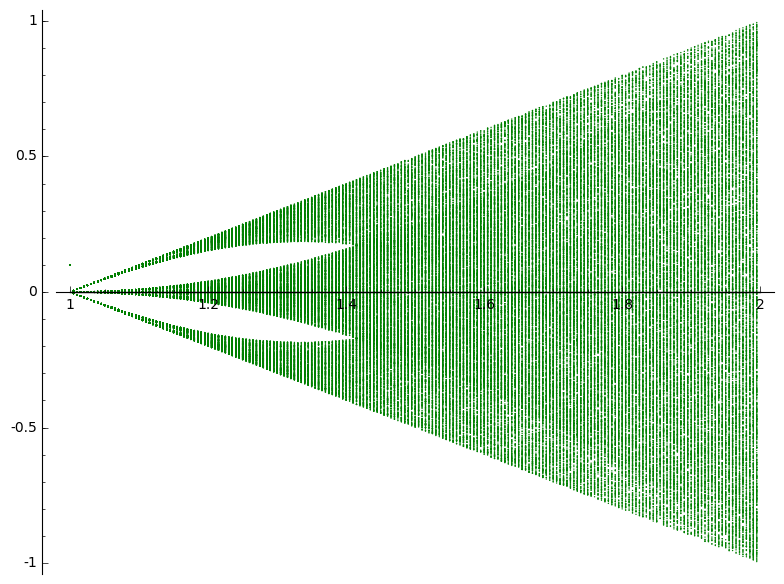

In [5]:
xMin = 1
xMax = 2

pBif = plot( 0, x, xMin, xMax, ymin=-1, ymax=1, color="black")

resolution = 200
for inc in range(resolution) :
  eta = 1 + inc/resolution
  xi = 0.1
  for dummy in range(1000) :
    xi = f(xi, eta)
    
  attractor = [(eta,xi)] 
  for dummy in range(1000) :
    xi = f(xi, eta)
    attractor.append((eta, xi))
    
  pBif += point(attractor, color="green", size=1)


show( pBif )